# Aprendiendo Fashion-MNIST con PyTorch

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [7]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [5]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [6]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [14]:
# 1.4)
import google.colab
from google.colab import files

ModuleNotFoundError: No module named 'google'

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores de los pixeles) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [7]:
# 2.1)
# Define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,), (0.5,))
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

# Download and load the training data
train_set = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

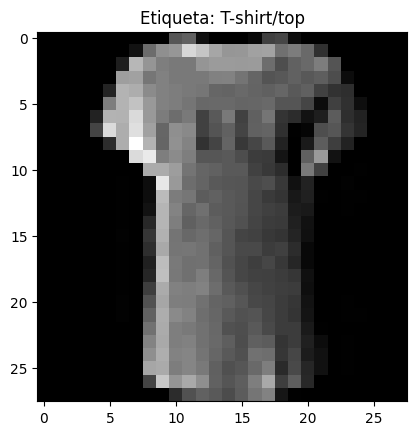

Forma del tensor de la imagen: torch.Size([1, 28, 28])


tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -0.3255, -0.2392, -0.8745, -1.0000,
          -1.0000, -1.0000, -0.9294, -0.4980, -0.4510, -0.8980, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.8588, -0.1529,  0.1137,  0.1686,  0.6784,  0.5373,  0.2941,
           0.1686,  0.1765,  0.2549,  0.2706, -0.1216, -0.0275, -0.1765,
          -0.6157, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7647,
           0.4275,  0.1608, -0.0118, -0.0510, -0.0431,  0.1608,  0.2078,
           0.2078,  0.2000,  0.2078, -0.1451, -0.3882, -0.2314, -0.1686,
          -0.0196, -0.3412, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.2314,
           0.2549, -0.0745,  0.0039, -0.0431, -0

In [ ]:
#2.2 
i = 600
img, label = train_set[i]

#2.3
label_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Como tiene forma [1, 28, 28], quitamos la dimensión del canal

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta: {label_dict[label]}")
plt.show()
print(f"Forma del tensor de la imagen: {img.shape}")
#img tiene shape [C, H, W]. Si C = 1 sólo existe img[0], 
# para acceder a un píxel: img[0, y, x].
#cuando es rgb es como si tuvieras 3 matrices, una por canal, 
# cada una de ellas indica la cantidad de cada color en cada píxel.
#como aca hay un solo canal, ya que es escala de grises, hay una dimension innecesaria.
#por eso se usa squeeze, para eliminar dimensiones de tamaño 1.

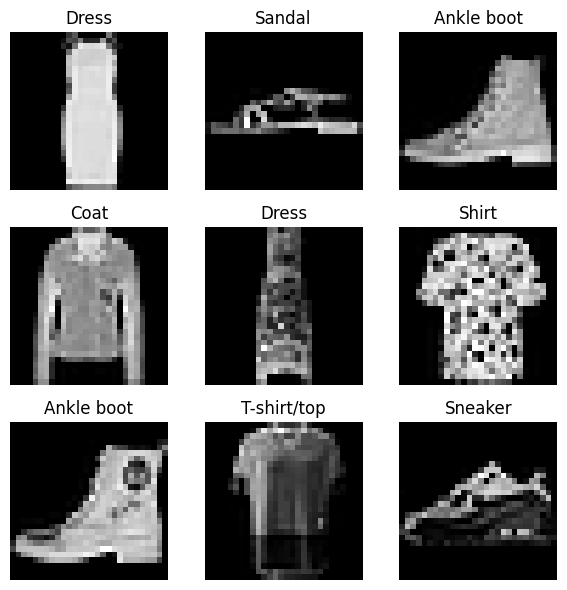

In [ ]:

#2.4
#mosaico 3x3 de imagenes random
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for ax in axes.flatten():
    i = np.random.randint(len(train_set))
    img, label = train_set[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"{label_dict[label]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [ ]:
# 3.1)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = 100, shuffle = True)

 num_samples : 60000
 num_batches : 600
Forma del batch de imágenes: torch.Size([100, 1, 28, 28])
Forma del batch de etiquetas: torch.Size([100])


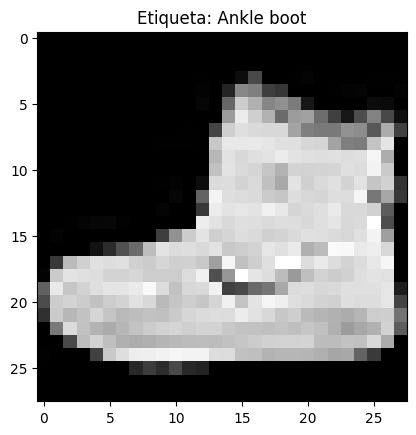

In [72]:
print(f" num_samples : {len(train_loader.dataset)}")
print(f" num_batches : {len(train_loader)}")
dataiter = iter(train_loader)
#si shuffle esta en false da siempre lo mismo, porque siempre creo el iterador 
# de nuevo. Si no, como shuffle los crea distinto cada vez, da distinto.
# next(dataiter) # si pongo esto antes, entonces muestro el segundo
images, labels = next(dataiter)
print(f"Forma del batch de imágenes: {images.shape}")
print(f"Forma del batch de etiquetas: {labels.shape}")

#img example
img = images[0]  # Agregar dimensión de batch
label = label_dict[labels[0].item()]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta: {label}")
plt.show()

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [75]:
# 4)
class NeuralNetwork(nn.Module):
    def __init__(self,n1,n2,p=0.2):
        super(NeuralNetwork,self).__init__()
        #capa0
        self.flatten = nn.Flatten() 

        #capa 1
        self.fc1 = nn.Linear(28*28,n1)  
        self.relu = nn.ReLU() #modulo relu1
        self.dropout = nn.Dropout(p) #modulo dropout1

        #capa2
        self.fc2 = nn.Linear(n1,n2)      #capa 2
        #self.relu2 = nn.ReLU()           #modulo relu2 (se reutilizan las del 1 asi q las comento)
        #self.dropout2 = nn.Dropout(p)    #modulo dropout2

        #capa3
        self.fc3 = nn.Linear(n2,10)     #capa 3
    
    def forward(self,x):
        #capa0
        x = self.flatten(x)
        #capa1
        x = self.fc1(x)             
        x = self.relu(x)            #modulo relu1
        x = self.dropout(x)         #modulo dropout1
        #capa2
        x = self.fc2(x)             
        x = self.relu(x)            #modulo relu2
        x = self.dropout(x)         #modulo dropout2
        #capa3
        x = self.fc3(x)             
        return x

mi_red = NeuralNetwork(128,64,p=0.2)
mi_red(img).shape

torch.Size([1, 10])

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [ ]:
# 5.1)